In [0]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [0]:
%matplotlib inline

In [0]:
import requests
from io import StringIO

In [0]:
# アメリカ合衆国大統領選挙世論調査データ
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

In [0]:
source = requests.get(url).text

In [9]:
source

'Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration\nPolitico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000,Likely Voters,Live Phone,47.0,47.0,6.0,,https://elections.huffingtonpost.com/pollster/polls/politico-gwu-battleground-16674,http://www.politico.com/news/stories/1112/83380.html,Nonpartisan,None,,1\nYouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740,Likely Voters,Internet,49.0,47.0,3.0,,https://elections.huffingtonpost.com/pollster/polls/yougov-economist-16733,http://cdn.yougov.com/cumulus_uploads/document/6pkdh10fns/econToplines.pdf,Nonpartisan,None,,1\nGravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872,Likely Voters,Automated Phone,48.0,48.0,4.0,,https://elections.huffingtonpost.com/pollster/polls/gravis-marketing-16681,http://www.gravispolls.com/2012/11/gravis-marketing-national-poll-shows.h

In [0]:
poll_data = StringIO(source) # データをファイルのように扱える

In [0]:
poll_df = pd.read_csv(poll_data)

In [12]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [17]:
poll_df[['Pollster', 'Partisan', 'Affiliation']].sort_values('Pollster').drop_duplicates()

,Pollster,Partisan,Affiliation
404,ABC/Post,Nonpartisan,None
471,AP-GfK,Nonpartisan,None
90,ARG,Nonpartisan,None
132,Allstate/National Journal,Nonpartisan,None
305,Angus-Reid,Nonpartisan,None
...,...,...,...
105,United Technologies/National Journal,Nonpartisan,None
62,Washington Times/JZ Analytics,Nonpartisan,None
18,YouGov,Nonpartisan,None
533,YouGov/Economist,Nonpartisan,None


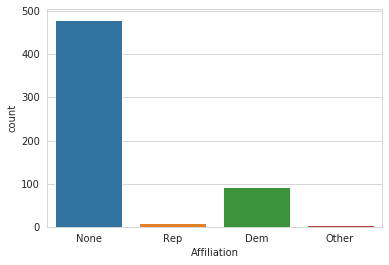

In [18]:
sns.countplot('Affiliation', data=poll_df)

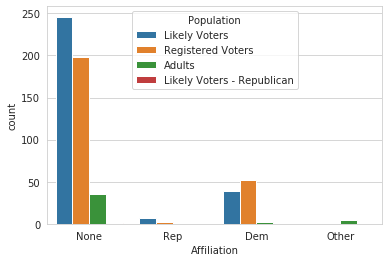

In [20]:
sns.countplot('Affiliation', data=poll_df, hue='Population')

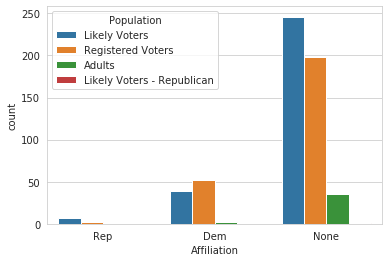

In [21]:
sns.countplot('Affiliation', data=poll_df, hue='Population', order=['Rep', 'Dem', 'None'])

In [0]:
avg = pd.DataFrame(poll_df.mean())

In [32]:
avg

,0
Number of Observations,1296.679078
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN
Question Iteration,1.000000


In [0]:
labels = ['Number of Observations','Other', 'Question Text', 'Question Iteration']
for label in labels:
  avg.drop(label, axis=0, inplace=True)

In [34]:
avg

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827


In [0]:
std = pd.DataFrame(poll_df.std())
labels = ['Number of Observations','Other', 'Question Text', 'Question Iteration']
for label in labels:
  std.drop(label, axis=0, inplace=True)

In [39]:
std

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754


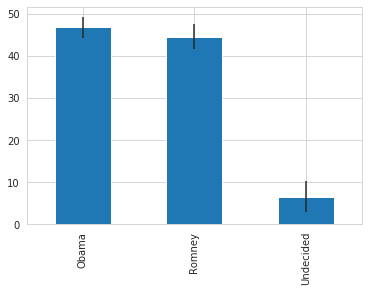

In [40]:
avg.plot(yerr=std, kind='bar', legend=False)

In [0]:
poll_avg = pd.concat([avg, std], axis=1)
poll_avg.columns = ['Average', 'STD']

In [42]:
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
